## Tic-Tac-Toe 

In this exercise we will implement the game of [Tic-Tac-Toe](https://en.wikipedia.org/wiki/Tic-tac-toe) (also known as _noughts and crosses_) and learn an optimal policy using **Q-learning**. We will then implement **SARSA** and compare the two learning approaches with each other.

### The game

Tic-Tac-Toe is a paper-and-pencil game for two players, O and X, who take turns marking the spaces in a 3×3 grid. The player who succeeds in placing three of their marks in a horizontal, vertical, or diagonal row wins the game. 

### Instructions
Implement the game of Tic-Tac-Toe. The first-moving player is randomly chosen at the beginning of each episode. Rewards of +1, −1, and 0 are given for winning, losing, and drawing, respectively. All rewards within a game are zero; do not discount ($\gamma = 1$). Player X will always be played by a _random agent_. This agent randomly chooses one of the empty grid spaces and marks it with "X". You will implement different agents for Player O.


In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Game Tic-Tac-Toe environment
class Board:
    def __init__(self, player_1, player_2):
        self.board = np.array([[' ', ' ', ' '], [' ', ' ', ' '], [' ', ' ', ' ']])
        self.player1_marker = player_1.marker
        self.player2_marker = player_2.marker
        self.active = False
        self.winner = None
    
    # get the possible choices for next step
    def get_possible_step(self):
        pos_step = []
        for i in itertools.product(np.arange(0,3),np.arange(0,3)):
            if self.board[i] == ' ':
                pos_step.append(i)
        return pos_step
   
    # print the current state of the board
    def print_board(self):
        print_cor = (((0,0),(0,1),(0,2)),((1,0),(1,1),(1,2)),((2,0),(2,1),(2,2)))
        for i in print_cor:
            print(self.board[i[0]] + '|' + self.board[i[1]] + '|' + self.board[i[2]])
    
    # check if the game is end
    def check(self):
        # check who is win
        win_conditions = (((0,0),(0,1),(0,2)),((1,0),(1,1),(1,2)),((2,0),(2,1),(2,2)),
                          ((0,0),(1,0),(2,0)),((0,1),(1,1),(2,1)),((0,2),(1,2),(2,2)),
                          ((0,0),(1,1),(2,2)),((0,2),(1,1),(2,0)))
        for each in win_conditions:
            if self.board[each[0]] == self.board[each[1]]  == self.board[each[2]]:
                if self.board[each[0]] != ' ':
                    self.winner = self.board[each[0]]
        
        if self.winner == self.player1_marker:
            player1_reward = 1
            player2_reward = -1
            self.active = False
            return player1_reward, player2_reward

        if self.winner == self.player2_marker:
            player1_reward = -1
            player2_reward = 1
            self.active = False
            return player1_reward, player2_reward
        
        # check if it's draw
        if len(self.get_possible_step()) == 0 and self.winner is None:
            player1_reward = 0
            player2_reward = 0
            self.active = False
            return player1_reward, player2_reward
        
        # if the game is not end 
        player1_reward = 0
        player2_reward = 0
        return player1_reward, player2_reward
    
    # make step function
    def make_step(self, player, step_coordinate):
        self.board[step_coordinate] = player.marker
        player1_reward, player2_reward = self.check()
        new_state = self.board
        
        return player1_reward, player2_reward, new_state
    
    # reset the game
    def reset_game(self):
        self.active = True
        self.winner = None
        self.board = np.array([[' ', ' ', ' '], [' ', ' ', ' '], [' ', ' ', ' ']])

### a) Random policy against a random policy 
Test your Tic-Tac-Toe implementation by letting two random agents play against each other. Plot the **cumulative rewards** of both O and X as a function of the number of episodes played. 

In [3]:
### Your code for Exercise a

# Random Agent
class random_agent:
    def __init__(self, marker):
        self.marker = marker
        
    def choose_step(self, board):
        pos_step = board.get_possible_step()
        chosen_step = pos_step[np.random.choice(len(pos_step))]
        return chosen_step

In [4]:
def simulate_game_random(player_1, player_2, episodes):
    env = Board(player_1, player_2)
    player_1_record = np.zeros(episodes)
    player_2_record = np.zeros(episodes)
    player_1_total = 0
    player_2_total = 0
    
    for episode in range(episodes):
    
        env.reset_game()
        
        # Switch players
        player_first, player_second = (player_1, player_2) if np.random.choice(2) == 0 else (player_2, player_1)
        
        # Play
        while env.active == True:

            player_first_step = player_first.choose_step(env)
            player_1_reward, player_2_reward, new_state = env.make_step(player_first, player_first_step)

            player_1_total += player_1_reward
            player_2_total += player_2_reward
            if env.active == True:
                player_second_step = player_second.choose_step(env)
                player_1_reward, player_2_reward, new_state = env.make_step(player_second, player_second_step)

                player_1_total += player_1_reward
                player_2_total += player_2_reward
                pos_step_after = env.get_possible_step()

            else:
                pos_step_after = env.get_possible_step()
                    
        player_1_record[episode] = player_1_total
        player_2_record[episode] = player_2_total
        
    return player_1_record, player_2_record

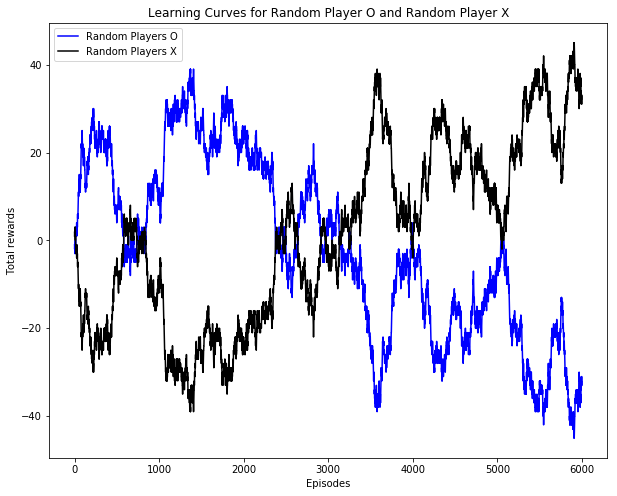

In [5]:
player1_random = random_agent('O')
player2_random = random_agent('X')
episodes = 6000

player1_record, player2_record = simulate_game_random(player1_random, player2_random, episodes)


fig = plt.figure(figsize=(10, 8))

plt.plot(np.arange(episodes), np.array(player1_record), color = 'b', 
         label = 'Random Players O')
plt.plot(np.arange(episodes), np.array(player2_record), color = 'k', 
         label = 'Random Players X')

plt.legend(loc = 'best')
plt.xlabel('Episodes')
plt.ylabel('Total rewards')
plt.title('Learning Curves for Random Player O and Random Player X')
plt.show()

## Explanation 

The cumulative graph shows the accumulated rewards for both the agents which are opposite of each other in every episode (when one wins, other loses) thus, the mirror graphs. This is an expected result as both the agents are random and do not learn like Q or SARSA agent, thus, both perform identically. We also observe that quantitatively the values are opposite of each other. 

### b) Q-learning 
Use Q-learning to learn an optimal policy for playing Tic-Tac-Toe against a random opponent. Produce a learning curve for your agent. That is, (1) plot **average return** as a function of episodes, (2) the learning curve should plot the average return of many agents (please specify how many agents you are averaging). 

 

In [6]:
# Q Agent
class Q_Agent:
    def __init__(self, marker, alpha = 0.1, greedy = 0.05):
        self.marker = marker
        self.alpha = alpha
        self.greedy = greedy
        self.q = {}
    
    # get q value, if the key is not exist (since initial the q table as empty dictionary), initialise its value as 0
    def getQ(self, state, step):
        if self.q.get((state, step)) is None:
            self.q[(state, step)] = 0
        return self.q.get((state, step))
    
    def choose_step(self, env):
        current_state = tuple(map(tuple, env.board))
        pos_step = env.get_possible_step()
        if np.random.rand(1) < self.greedy:
            # choose non-greedy action 
            chosen_step = pos_step[np.random.choice(len(pos_step))]
        else:
            # choose greedy action according to Q table
            # get the maximum Q value of the current state
            max_q = np.array([self.getQ(current_state, p_step) for p_step in pos_step]).max()
            # create a current dictionary which is a part of Q table to avoid of different state, but same q value
            current_key = [(current_state, p_step) for p_step in pos_step]
            new_d = {key:self.q[key] for key in current_key}
            # choose the action, if there are several actions, choose randomly
            choices = [key for key in new_d.keys() if new_d[key]==max_q]  
            chosen_step = choices[np.random.choice(len(choices))][1]
            
        return chosen_step
    
    def Q_learn(self, old_state, new_state, step, reward, pos_step_after):
        old_state = tuple(map(tuple, old_state))
        new_state = tuple(map(tuple, new_state))
        if len(pos_step_after) == 0:
            pass
        else:
            max_value = np.array([self.getQ(new_state, p_step) for p_step in pos_step_after]).max()
            self.q[(old_state,step)] = (1-self.alpha)*self.getQ(old_state,step)+self.alpha*(reward+max_value)

            
            

In [7]:
# define a function that simulate Q learning
def simulate_game_Q(player_1, player_2, episodes):
    # asumme player_1 is always the Q-learning Agent
    env = Board(player_1, player_2)
    player_1_record = np.zeros(episodes)
    player_2_record = np.zeros(episodes)
    player_1_total = 0
    player_2_total = 0
    for episode in range(episodes): 
        
        env.reset_game()

        player_first =  player_1
        player_second = player_2
        
        # play the game
        while env.active == True:
            temp_reward = 0
            old_state = env.board.copy()
            player_first_step = player_first.choose_step(env)
            player_1_reward, player_2_reward, new_state = env.make_step(player_first, player_first_step)
            temp_reward += player_1_reward
            player_1_total += player_1_reward
            player_2_total += player_2_reward
            if env.active == True:
                player_second_step = player_second.choose_step(env)
                player_1_reward, player_2_reward, new_state = env.make_step(player_second, player_second_step)
                temp_reward += player_1_reward
                player_1_total += player_1_reward
                player_2_total += player_2_reward
                pos_step_after = env.get_possible_step()
                player_1.Q_learn(old_state, new_state, player_first_step, temp_reward, pos_step_after)

            else:
                pos_step_after = env.get_possible_step()
                player_1.Q_learn(old_state, new_state, player_first_step, temp_reward, pos_step_after)
                    
        player_1_record[episode] = player_1_total
        player_2_record[episode] = player_2_total
        
    return player_1_record, player_2_record

#### 1 Q Learning Agent

In [8]:
player_random = random_agent('X')
episodes = 50000
player_Q_record = []

player_Q = Q_Agent('O')
player_Q_record, player_random_record = simulate_game_Q(player_Q, player_random, episodes)  # Returns Cumulative Record


# Non Cumulative Record
new_Q_rec = []
for i in range(1,episodes):
    new_val = player_Q_record[i] - player_Q_record[i-1]
    new_Q_rec.append(new_val)

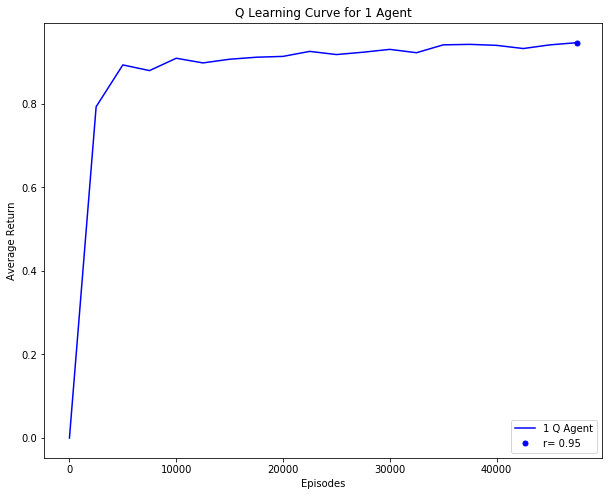

In [9]:
player_Q_avg = []
iter_Q = []
sum_q = 0

# Average of Batch (2500 iterations)
for i in range(0, len(new_Q_rec)):
    if i%2500 == 0:
        average = sum_q/2500
        player_Q_avg.append(average)
        iter_Q.append(i)
        sum_q = 0
    else:
        sum_q += new_Q_rec[i]

        
# Plotting average batch return v/s iteration number    
plt.figure(figsize=(10,8))  
plt.plot(iter_Q,player_Q_avg,'b', label='1 Q Agent')
plt.plot(iter_Q[-1],player_Q_avg[-1],'b.', markersize=10, label='r= %.2f' %player_Q_avg[-1])
plt.title('Q Learning Curve for 1 Agent')
plt.xlabel('Episodes')
plt.ylabel('Average Return')
plt.legend(loc='lower right')
plt.show()



#### 5 Q Learning Agents

In [10]:
agents = 5

player_random = random_agent('X')
episodes = 30000
player_Q_record_5 = []
non_cum_Q_record_5 = []


for i in range(agents):
    player_Q = Q_Agent('O')
    player_Q_record_5.append(simulate_game_Q(player_Q, player_random, episodes)[0])  # Cumulative Record
    
    # Non cumulative record
    new_Q_rec = []
    for j in range(1,episodes):
        new_val = player_Q_record_5[i][j] - player_Q_record_5[i][j-1]
        new_Q_rec.append(new_val) 
    non_cum_Q_record_5.append( new_Q_rec)
    


In [11]:
player_Q_avgs_5 = []

iter_Q_5 = np.linspace(1, 30000, 15)

# Average over Batch (2000 iterations)
for i in range(agents):
    sum_Q_5 = 0
    player_Q_avg_5 = []
    for j in range(0, len(non_cum_Q_record_5[i])):
        if j%2000 == 0:
            average = sum_Q_5/2000
            player_Q_avg_5.append(average) 
            sum_Q_5 = 0
        else:
            sum_Q_5 += non_cum_Q_record_5[i][j]
            
    player_Q_avgs_5.append(player_Q_avg_5)
    
 

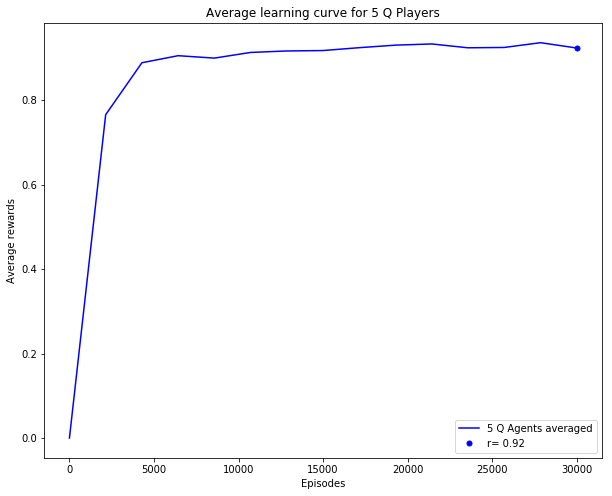

In [12]:
# Plotting average batch return vs iteration number for 5 Q Agents
fig = plt.figure(figsize=(10, 8))

plt.plot(iter_Q_5, np.array(player_Q_avgs_5).mean(axis = 0), color = 'b', 
         label = '5 Q Agents averaged')
plt.plot(iter_Q_5[-1], np.array(player_Q_avgs_5).mean(axis = 0)[-1], 'b.', markersize=10, label='r= %.2f' %np.array(player_Q_avgs_5).mean(axis = 0)[-1])
plt.xlabel('Episodes')
plt.ylabel('Average rewards')
plt.title('Average learning curve for 5 Q Players')
plt.legend(loc='lower right')
plt.show()

In [13]:
### Use this cell to produce the learning curve for Exercise b

### EXPLANATION

The state representation we used is a dictionary, which gets initialized when a new key and value is inputted and while updating, a backup q table is created to avoid incorrect update. The Q learning curve has been produced by calculating the average return (not cumulative) for a batch of __2500__ episodes. It converges at __0.9x__ which means in the last average batch, 9x% of the games played by Q agent resulted in a win. The graph with 5 Q agents is essentially identical to 1 Q agent except for being comparatively smoother.


### c) Optimal policy 
What is the optimal play for the agent in the following state? 
<img src="images/tic_tac_toe.png" style="width: 80px;"/> 
You must answer by writing a function that takes a state as input and _prints_ the "after-state" that would result from playing an optimal action. The printed output can be primitive but the board has to be somewhat recognizable.   

In [14]:
# Game Tic-Tac-Toe environment with new input state
class Board_2:
    def __init__(self, player_1, player_2):
        self.board = np.array([['O', 'X', ' '], [' ', 'X', ' '], [' ', 'O', ' ']])
        self.player1_marker = player_1.marker
        self.player2_marker = player_2.marker
        self.active = False
        self.winner = None
    
    # get the possible choices for next step
    def get_possible_step(self):
        pos_step = []
        for i in itertools.product(np.arange(0,3),np.arange(0,3)):
            if self.board[i] == ' ':
                pos_step.append(i)
        return pos_step
   
    # print the current state of the board
    def print_board(self):
        print_cor = (((0,0),(0,1),(0,2)),((1,0),(1,1),(1,2)),((2,0),(2,1),(2,2)))
        for i in print_cor:
            print(self.board[i[0]] + '|' + self.board[i[1]] + '|' + self.board[i[2]])
    
    # check if the game is end
    def check(self):
        # check who is win
        win_conditions = (((0,0),(0,1),(0,2)),((1,0),(1,1),(1,2)),((2,0),(2,1),(2,2)),
                          ((0,0),(1,0),(2,0)),((0,1),(1,1),(2,1)),((0,2),(1,2),(2,2)),
                          ((0,0),(1,1),(2,2)),((0,2),(1,1),(2,0)))
        for each in win_conditions:
            if self.board[each[0]] == self.board[each[1]]  == self.board[each[2]]:
                if self.board[each[0]] != ' ':
                    self.winner = self.board[each[0]]
        
        if self.winner == self.player1_marker:
            player1_reward = 1
            player2_reward = -1
            self.active = False
            return player1_reward, player2_reward

        if self.winner == self.player2_marker:
            player1_reward = -1
            player2_reward = 1
            self.active = False
            return player1_reward, player2_reward
        
        # check if it's draw
        if len(self.get_possible_step()) == 0 and self.winner is None:
            player1_reward = 0
            player2_reward = 0
            self.active = False
            return player1_reward, player2_reward
        
        # if the game is not end 
        player1_reward = 0
        player2_reward = 0
        return player1_reward, player2_reward
    
    # make step function
    def make_step(self, player, step_coordinate):
        self.board[step_coordinate] = player.marker
        player1_reward, player2_reward = self.check()
        new_state = self.board
        
        return player1_reward, player2_reward, new_state
    
    # reset the game
    def reset_game(self):
        self.active = True
        self.winner = None
        self.board = np.array([['O', 'X', ' '], [' ', 'X', ' '], [' ', 'O', ' ']])
        

In [15]:
agent_ran = random_agent('O')
agent_Q = Q_Agent('X')
env = Board_2(agent_ran, agent_Q)
print('Input State:\n')
env.print_board()   # Print input state

episodes = 100000
player_Q_record = []

# Train the agent for 100000 episodes with new inital state
agent_Q_record, agent_random_record = simulate_game_Q(agent_Q, agent_ran, episodes) 

# Get Q values of all probable states
moves = [(0,2), (1,0), (1,2), (2,0), (2,2)]
moves_q_val = [agent_Q.q[((('O', 'X', ' '), (' ', 'X', ' '), (' ', 'O', ' ')), (0, 2))], agent_Q.q[((('O', 'X', ' '), (' ', 'X', ' '), (' ', 'O', ' ')), (1, 0))], agent_Q.q[((('O', 'X', ' '), (' ', 'X', ' '), (' ', 'O', ' ')), (1, 2))], agent_Q.q[((('O', 'X', ' '), (' ', 'X', ' '), (' ', 'O', ' ')), (2, 0))], agent_Q.q[((('O', 'X', ' '), (' ', 'X', ' '), (' ', 'O', ' ')), (2, 2))]]

# Best move is move with highest Q value
best_move = moves[np.argmax(moves_q_val)] 
print('\nAll moves: ',moves)
print('Best Move: ', best_move)
print('\nOutput State:\n')

# Print new state 
print_cor = (((0,0),(0,1),(0,2)),((1,0),(1,1),(1,2)),((2,0),(2,1),(2,2)))
for i in print_cor:
    for j in i:
        if j==best_move:
            env.board[j] = 'X'
    
    print(env.board[i[0]] + '|' + env.board[i[1]] + '|' + env.board[i[2]])

Input State:

O|X| 
 |X| 
 |O| 

All moves:  [(0, 2), (1, 0), (1, 2), (2, 0), (2, 2)]
Best Move:  (2, 0)

Output State:

O|X| 
 |X| 
X|O| 


Please ignore this cell. We will use this cell to mark your answer. 


### d) Sarsa 
Implement Sarsa to learn how to play Tic-tac-toe against a random player. Produce a learning curve. 




In [17]:
# Sarsa Agent
class Sarsa_Agent:
    def __init__(self, marker, alpha = 0.1, greedy = 0.1):
        self.marker = marker
        self.alpha = alpha
        self.greedy = greedy
        self.q = {}
    
    # get q value, if the key is not exist (since initial the q table as empty dictionary), initial its value as 0
    def getQ(self, state, step):
        if self.q.get((state, step)) is None:
            self.q[(state, step)] = 0
        return self.q.get((state, step))
    
    def choose_step(self, env):
        current_state = tuple(map(tuple, env.board))
        pos_step = env.get_possible_step()
        if len(pos_step) == 0:
            # chose (3,3) as an unexist step in the game, just to make the program pass
            chosen_step = (3,3)
        elif np.random.rand(1) < self.greedy:
            # choose not greedy action 
            chosen_step = pos_step[np.random.choice(len(pos_step))]
        else:
            # choose greedy action according to Q table
            # get the maximum Q value of the current state
            max_q = np.array([self.getQ(current_state, p_step) for p_step in pos_step]).max()
            # create a current dictionary which is a part of Q table to avoid of different state, but same q value
            current_key = [(current_state, p_step) for p_step in pos_step]
            new_d = {key:self.q[key] for key in current_key}
            # choose the action, if there are several actions, choose randomly
            choices = [key for key in new_d.keys() if new_d[key]==max_q]  
            chosen_step = choices[np.random.choice(len(choices))][1]
            
        return chosen_step
    
    def Sarsa_learn(self, old_state, new_state, old_step, new_step, reward):
        old_state = tuple(map(tuple, old_state))
        new_state = tuple(map(tuple, new_state))
        mask1 = self.getQ(old_state, old_step)
        mask2 = self.alpha * (reward + self.getQ(new_state, new_step) - mask1)
        self.q[(old_state,old_step)] = mask1 + mask2

In [18]:
# define a function that used to simulate Sarsa
def simulate_game_Sarsa(player_1, player_2, episodes):
    # asumme player_1 is always the SARSA Agent
    env = Board(player_1, player_2)
    player_1_record = np.zeros(episodes)
    player_2_record = np.zeros(episodes)
    player_1_total = 0
    player_2_total = 0
    for episode in range(episodes): 
        env.reset_game()
        # switch player
        if np.random.choice(2) == 0: # when player 1 go first
            old_player_1_step = player_1.choose_step(env)           
        else:  # when player 2 go fisrt
            player_2_step = player_2.choose_step(env)
            player_1_reward, player_2_reward, _ = env.make_step(player_2, player_2_step)
            player_1_total += player_1_reward
            player_2_total += player_2_reward
            old_player_1_step = player_1.choose_step(env)
        # play the game
        while env.active == True:
            temp_reward = 0
            old_state = env.board.copy()
            player_1_reward, player_2_reward, new_state = env.make_step(player_1, old_player_1_step)
            temp_reward += player_1_reward
            player_1_total += player_1_reward
            player_2_total += player_2_reward 
            if env.active == True:
                player_2_step = player_2.choose_step(env)
                player_1_reward, player_2_reward, new_state = env.make_step(player_2, player_2_step)
                temp_reward += player_1_reward
                player_1_total += player_1_reward
                player_2_total += player_2_reward
                new_player_1_step = player_1.choose_step(env)
                player_1.Sarsa_learn(old_state, new_state, old_player_1_step, new_player_1_step, 
                                     temp_reward)
                old_player_1_step = new_player_1_step
            else:
                # chose (3,3) as an unexist step in the game, just to make the program pass
                new_player_1_step = (3,3)
                player_1.Sarsa_learn(old_state, new_state, old_player_1_step, new_player_1_step, 
                                     temp_reward)
                    
        player_1_record[episode] = player_1_total
        player_2_record[episode] = player_2_total
        
    return player_1_record, player_2_record

In [19]:
player_random = random_agent('X')
episodes = 50000

player_SARSA_record = []
player_SARSA = Sarsa_Agent('O')
player_SARSA_record = simulate_game_Sarsa(player_SARSA, player_random, episodes)[0]  # Cumulative Record

# Non cumulative record
new_SARSA_rec = []
for i in range(1,episodes):
    new_val = player_SARSA_record[i] - player_SARSA_record[i-1]
    new_SARSA_rec.append(new_val)   
        

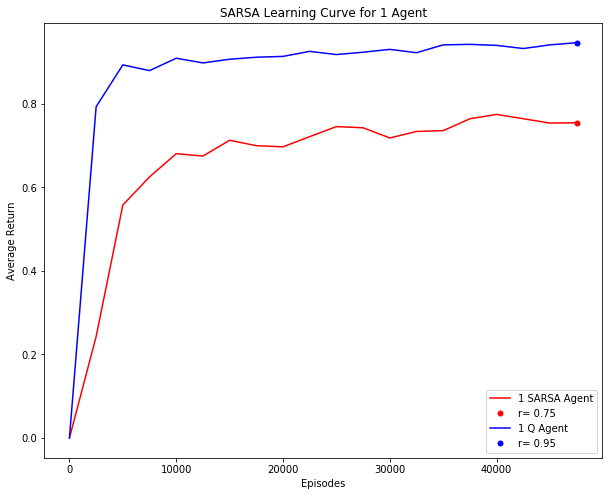

In [20]:
player_SARSA_avg = []
sum_SARSA = 0
iter_SARSA = []

# Average return for Batch (2500 iterations)
for i in range(0, len(new_SARSA_rec)):
    if i%2500 == 0:
        average = sum_SARSA/2500
        player_SARSA_avg.append(average) 
        iter_SARSA.append(i)
        sum_SARSA = 0
    else:
        sum_SARSA += new_SARSA_rec[i]

        
# Plotting average batch return v/s iteration number  
plt.figure(figsize=(10,8))
plt.plot(iter_SARSA,player_SARSA_avg, 'r', label='1 SARSA Agent')
plt.plot(iter_SARSA[-1], player_SARSA_avg[-1], 'r.', markersize=10, label='r= %.2f' %player_SARSA_avg[-1])
plt.plot(iter_Q,player_Q_avg,'b', label='1 Q Agent')
plt.plot(iter_Q[-1],player_Q_avg[-1],'b.', markersize=10, label='r= %.2f' %player_Q_avg[-1])
plt.title('SARSA Learning Curve for 1 Agent')
plt.xlabel('Episodes')
plt.ylabel('Average Return')
plt.legend(loc='lower right')
plt.show()


#### 5 SARSA Agents

In [21]:
agents = 5

player_random = random_agent('X')
episodes = 30000
player_SARSA_record_5 = []
non_cum_SARSA_record_5 = []


for i in range(agents):
    player_SARSA = Sarsa_Agent('O')
    player_SARSA_record_5.append(simulate_game_Sarsa(player_SARSA, player_random, episodes)[0]) # Cumulative Record
    
    # Non cumulative record
    new_SARSA_rec = []
    for j in range(1,episodes):
        new_val = player_SARSA_record_5[i][j] - player_SARSA_record_5[i][j-1]
        new_SARSA_rec.append(new_val) 
    non_cum_SARSA_record_5.append( new_SARSA_rec)
    


In [22]:
player_SARSA_avgs_5 = []

iter_SARSA_5 = np.linspace(1, 30000, 15)

# Average over Batch (2000 iterations)
for i in range(agents):
    sum_SARSA = 0
    player_SARSA_avg = []
    for j in range(0, len(non_cum_SARSA_record_5[i])):
        if j%2000 == 0:
            average = sum_SARSA/2000
            player_SARSA_avg.append(average) 
            sum_SARSA = 0
        else:
            sum_SARSA += non_cum_SARSA_record_5[i][j]
            
    player_SARSA_avgs_5.append(player_SARSA_avg)
    
 

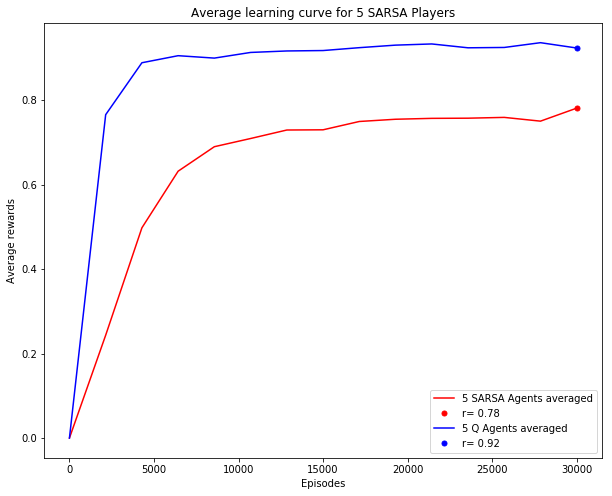

In [23]:
# Plotting average batch return vs iteration number for 5 SARSA and Q Agents
fig = plt.figure(figsize=(10, 8))

plt.plot(iter_SARSA_5, np.array(player_SARSA_avgs_5).mean(axis = 0), color = 'r', 
         label = '5 SARSA Agents averaged')
plt.plot(iter_SARSA_5[-1], np.array(player_SARSA_avgs_5).mean(axis = 0)[-1], 'r.', markersize=10, label='r= %.2f' %np.array(player_SARSA_avgs_5).mean(axis = 0)[-1])
plt.plot(iter_Q_5, np.array(player_Q_avgs_5).mean(axis = 0), color = 'b', 
         label = '5 Q Agents averaged')
plt.plot(iter_Q_5[-1], np.array(player_Q_avgs_5).mean(axis = 0)[-1], 'b.', markersize=10, label='r= %.2f' %player_Q_avg_5[-1])
plt.xlabel('Episodes')
plt.ylabel('Average rewards')
plt.title('Average learning curve for 5 SARSA Players')
plt.legend(loc='lower right')
plt.show()

In [24]:
### Use this cell to produce the plot for Exercise d

### EXPLANATION


From the two graphs above, we observe that the Q learning agents perform comparatively better than SARSA agents for the same number of episodes and batch sizes. Furthermore, the Q agents reach their convergence value faster. This is because Q learning is on-policy whereas SARSA is off-policy. In Q learning, we update the estimate from the maximum estimate of possible next actions, regardless of which action we took. Whilst in SARSA, we update estimates based on and take the same action. SARSA approaches convergence allowing for possible penalties from exploratory moves, whilst Q-learning ignores them, thus faster convergence.
